# Batch Gradient Descent
In batch gradient descent, we compute the gradient descent after making all the predictions.
Here we are implementing batch gd over multi linear regression

In [157]:
import numpy as np
import matplotlib.pyplot as plt

class BatchGD:
    def __init__(self, epochs, learning_rate):
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.lr = learning_rate
        self.beta = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        self.beta = np.ones(shape=X_train.shape[1])
        for i in range(self.epochs):
            y_pred = np.dot(X_train, self.beta)
            slope_beta = (-2/X_train.shape[0]) * np.dot(X_train.T, (y_train - y_pred))
            self.beta = self.beta - (self.lr * slope_beta)

        self.coef_ = self.beta[1:]
        self.intercept_ = self.beta[0]

        print(self.coef_, self.intercept_)

    def predict(self, X_test):
        self.coef_ = np.reshape(self.coef_, shape=(self.coef_.shape[0], 1))
        return (np.dot(X_test, self.coef_) + self.intercept_)
    
    def plot_coef(self):
        plt.plot(self.beta)
        plt.show()




In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("/Users/raaggee/Documents/MachineLearningImplementations/house_price_regression_dataset.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [111]:
df = df.drop("Year_Built", axis=1)
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,0.599637,0,5,2.623829e+05
1,4272,3,3,4.753014,1,6,9.852609e+05
2,3592,1,2,3.634823,0,9,7.779774e+05
3,966,1,2,2.730667,1,8,2.296989e+05
4,4926,2,1,4.699073,0,8,1.041741e+06


In [112]:
X = df.iloc[:, :6]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [174]:
bgd = BatchGD(10, 0.01)
bgd.fit(X_train, y_train)

[-1.27425598e+55 -1.11437691e+52 -7.35058815e+51 -1.07624326e+52
 -3.95161515e+51 -2.12146224e+52] -3.7812969311453937e+51


In [175]:
y_pred = bgd.predict(X_test)

In [176]:
from sklearn.metrics import r2_score, root_mean_squared_error
print(r2_score(y_test, y_pred))
print(root_mean_squared_error(y_test, y_pred))

-2.462911271765757e+106
3.9575900202551594e+58


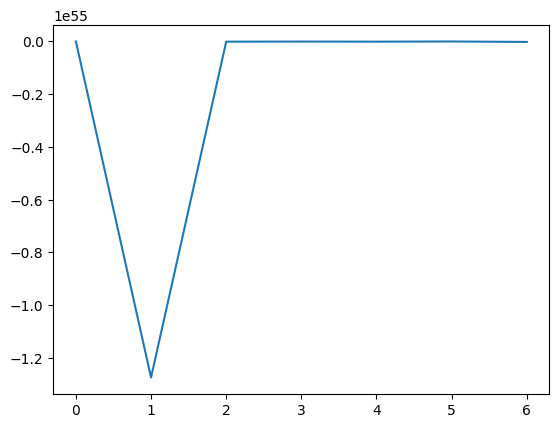

In [177]:
bgd.plot_coef()